In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("Algerian_forest_fires.csv",header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

In [8]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [10]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [12]:
dataset=dataset.dropna().reset_index(drop=True)

In [16]:
dataset.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [30]:
dataset=dataset.drop(122).reset_index(drop=True)
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [31]:
dataset.columns=dataset.columns.str.strip()

In [32]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [33]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [38]:
dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']]=dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']].astype(int)
dataset[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=dataset[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [39]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [42]:
dataset.to_csv("Algerian_Forest_Clean.csv",index=False)

# Exploratory Data Analytics

In [53]:
clean_data=dataset.drop(columns=["day","month","year"],axis=1)

In [54]:
clean_data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [56]:
#clean_data["Classes"].value_counts()
clean_data["Classes"]=clean_data["Classes"].str.strip()
clean_data["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [57]:
clean_data["Classes"]=np.where(clean_data["Classes"]=="not fire",0,1)
clean_data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [58]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [59]:
## Desity plot for all features

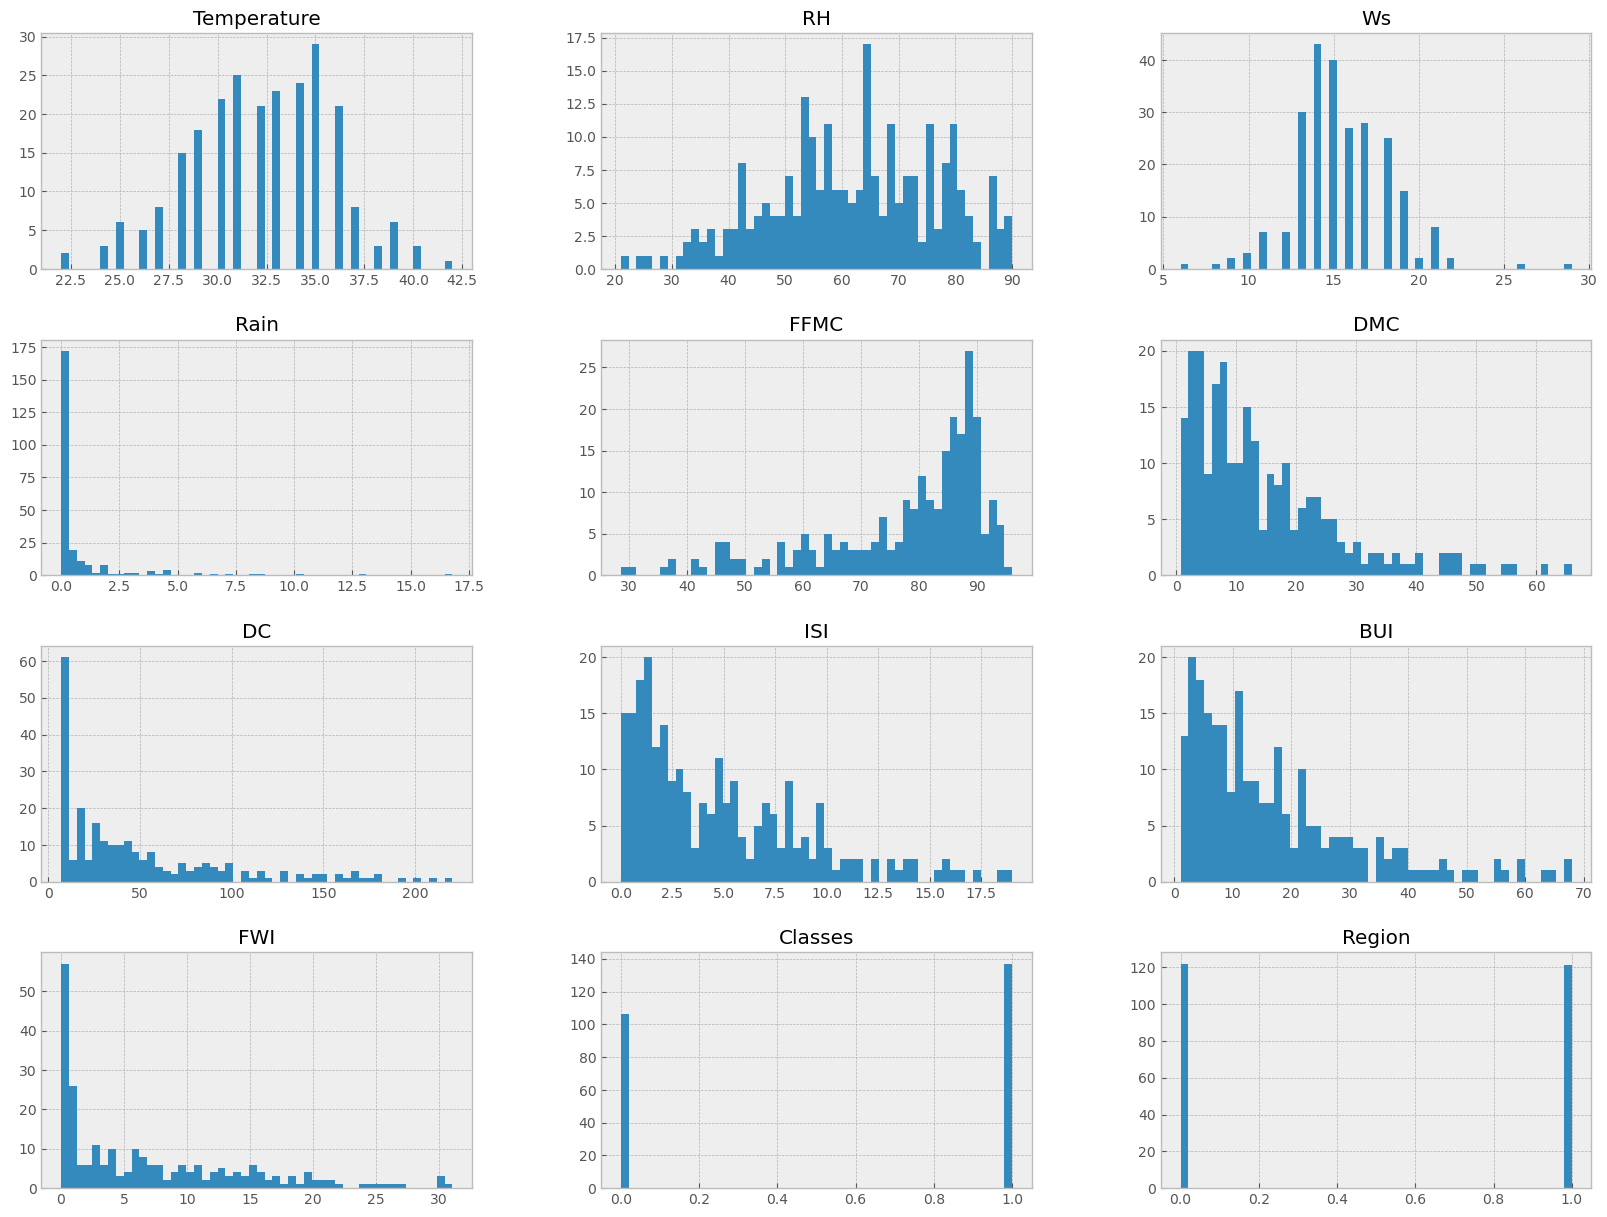

In [65]:
plt.style.use('bmh')
clean_data.hist(bins=50,figsize=(20,15))
plt.show()

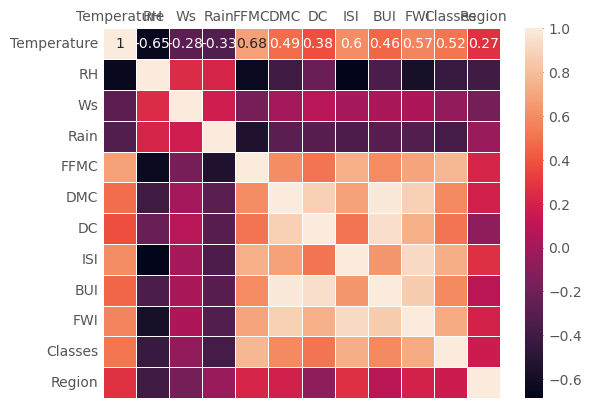

In [87]:
ax=sns.heatmap(clean_data.corr(),annot=True,linewidth=.5)
ax.xaxis.tick_top()

In [70]:
percentage=clean_data.Classes.value_counts(normalize=True)*100

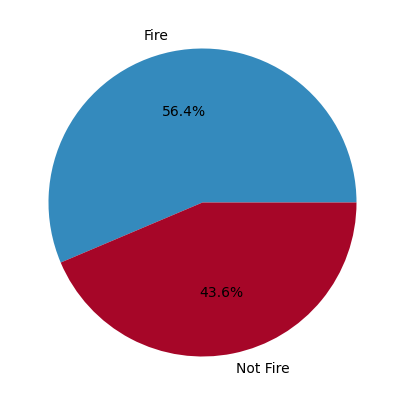

In [81]:
classes=['Fire','Not Fire']
plt.figure(figsize=(5,5))
plt.pie(percentage,labels=classes,autopct='%1.1f%%')
plt.show()

<Axes: >

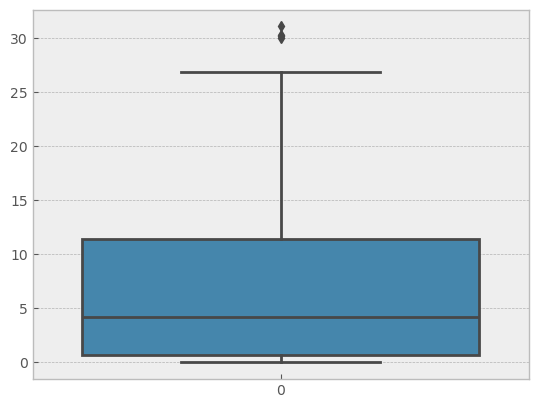

In [83]:
sns.boxplot(clean_data.FWI)

In [88]:
clean_data['month']=dataset['month']

In [89]:
clean_data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,month
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,6
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,6
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,6
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,6
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,6


C:\Users\Shivam Mittal\AppData\Local\Temp\ipykernel_11104\1037956758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_dataset['Classes']=np.where(R1_dataset['Classes']==1,"Fire","No Fire")


Text(0.5, 1.0, 'Fire analysis of Begaia Region.')

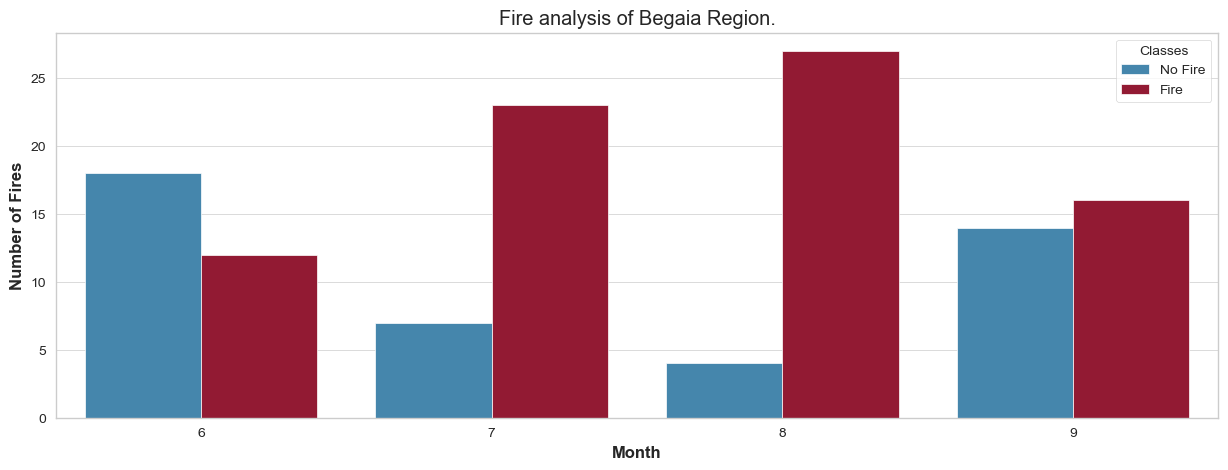

In [100]:
R1_dataset=clean_data.loc[clean_data['Region']==1]
R1_dataset['Classes']=np.where(R1_dataset['Classes']==1,"Fire","No Fire")
plt.subplots(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=R1_dataset)
plt.ylabel('Number of Fires',weight="bold")
plt.xlabel('Month',weight="bold")
plt.title("Fire analysis of Begaia Region.")

C:\Users\Shivam Mittal\AppData\Local\Temp\ipykernel_11104\3719865759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R2_dataset['Classes']=np.where(R2_dataset['Classes']==1,"Fire","No Fire")


Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Abbas Region.')

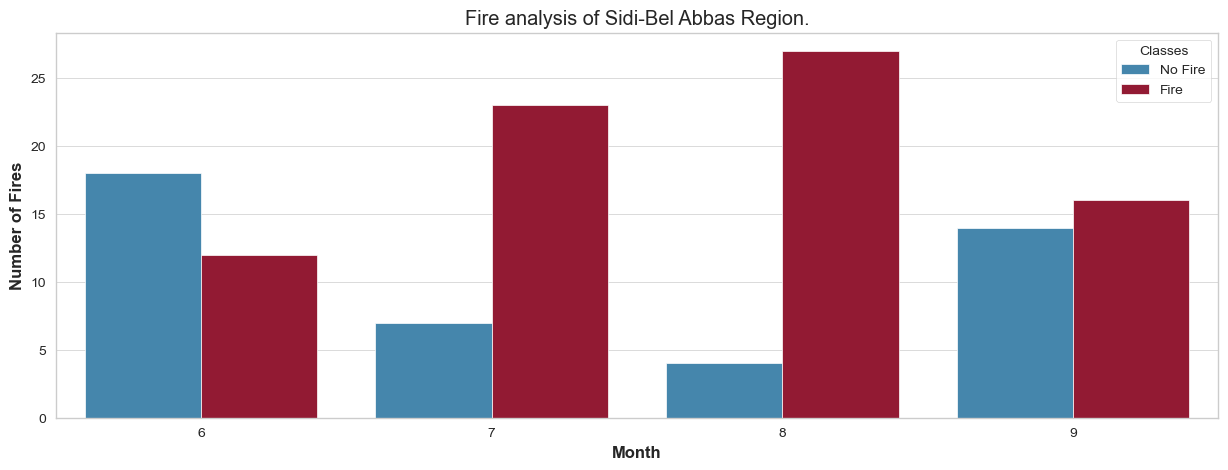

In [101]:
R2_dataset=clean_data.loc[clean_data['Region']==1]
R2_dataset['Classes']=np.where(R2_dataset['Classes']==1,"Fire","No Fire")
plt.subplots(figsize=(15,5))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=R2_dataset)
plt.ylabel('Number of Fires',weight="bold")
plt.xlabel('Month',weight="bold")
plt.title("Fire analysis of Sidi-Bel Abbas Region.")
